In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)

In [46]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [47]:
print(df.columns)
print(df.dtypes)
print(df.shape)

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')
Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object
(26406, 10)


In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [49]:
df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
Year                                            int32
Month                                           int32
dtype: object

In [52]:
df['Region'].unique().tolist()

['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']

### **Practice Task**

### TASK 1.1: Let's try to understand the change in average estimated fire area over time
(use pandas to plot)

In [ ]:
average_fire_area_overtime = df.groupby('Year')['Estimated_fire_area'].mean()
average_fire_area_overtime

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
2010     62.429968
2011    266.936175
2012    265.526196
2013     95.896092
2014    144.007348
2015    133.196719
2016     82.674717
2017    156.060061
2018    162.030426
2019    160.607150
2020     72.669665
Name: Estimated_fire_area, dtype: float64

In [29]:
average_fire_area_overtime.values

array([ 92.77050078, 176.28943438, 153.11246415,  99.75896758,
       141.62495547,  62.42996803, 266.93617454, 265.52619598,
        95.89609173, 144.00734816, 133.19671886,  82.67471658,
       156.06006111, 162.0304257 , 160.60714999,  72.66966458])

In [36]:
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
df_new.unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2005,70.619908,101.018747,40.901576,69.305388,93.834520,53.008088,68.894702,85.339337,114.282408,177.676820,163.266122,111.906784
2006,71.647220,35.668083,20.730261,62.949952,62.504889,60.690592,73.239330,185.319664,307.683233,270.115202,651.248125,224.027723
2007,76.201164,74.514055,21.549882,34.505488,50.206004,60.913220,91.494660,164.569228,448.244153,375.805878,302.741746,160.292883
2008,98.817536,19.826326,17.471887,64.099495,89.325604,45.786074,76.342062,116.545709,107.347072,245.951149,223.161061,73.177832
2009,42.269576,48.007746,24.991182,71.751712,75.705851,59.679823,68.415992,103.032714,161.458900,400.549585,358.865880,264.825571
2010,53.430312,66.264381,34.694920,43.528625,49.347853,59.856843,60.626592,97.497126,59.339218,80.664494,119.433015,35.456566
2011,54.154307,24.285958,55.628141,100.812237,133.642794,103.611263,112.124965,359.140796,863.788532,701.998658,301.700948,185.920414
2012,155.472477,105.520004,33.763152,123.120114,133.253825,156.588780,133.421678,244.132324,450.365960,691.053631,528.070641,239.673279
2013,152.299439,49.495502,26.642232,68.929494,46.479408,56.896112,70.068170,93.077617,139.909672,178.379314,158.502365,82.989415


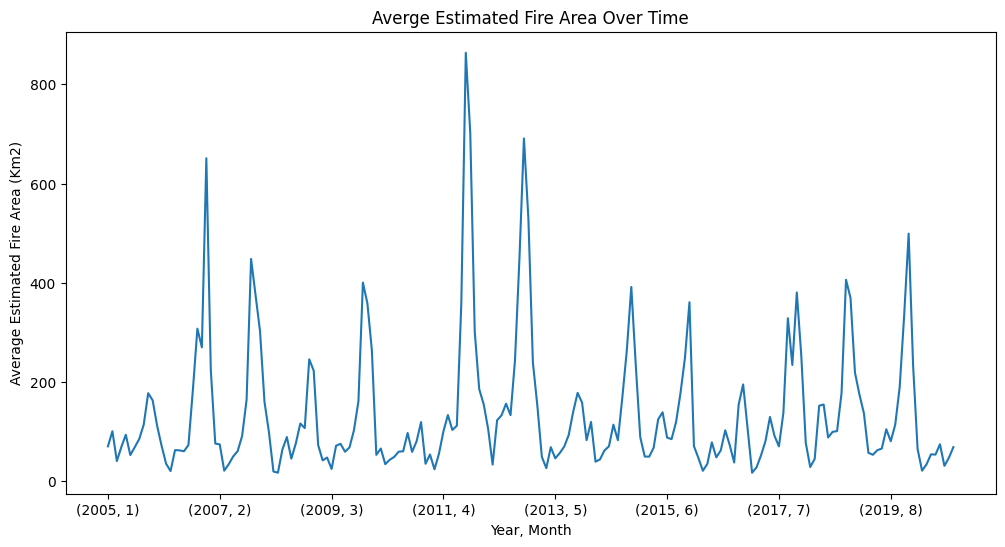

In [40]:
df_new.plot(x=df_new.index, y=df_new.values, figsize=(12,6))
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (Km2)')
plt.title('Averge Estimated Fire Area Over Time')
plt.show()

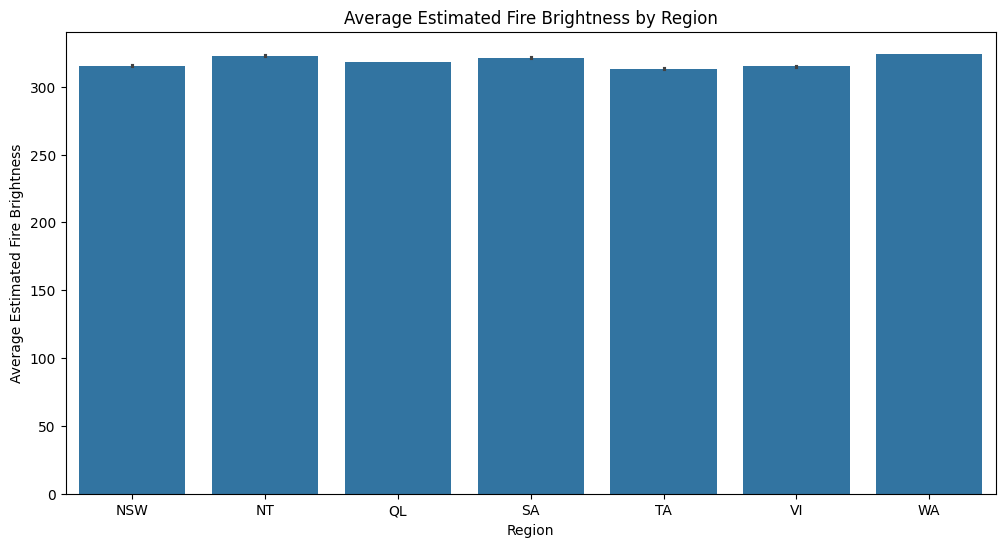

In [43]:
plt.figure(figsize=(12,6))

sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=df)
plt.xlabel('Region')
plt.ylabel('Average Estimated Fire Brightness')
plt.title('Average Estimated Fire Brightness by Region')
plt.show()